In [1]:
import pandas as pd
import numpy as np
from data_preprocess import Data

pop_df = Data.get_pop_df()
pop_df.head(5)

Using cached file: data\WPP2024_Demographic_Indicators_Medium.csv.gz


,Time,ISO2_code,Population
0,1970,BI,3487370
1,1971,BI,3573495
2,1972,BI,3661084
3,1973,BI,3573171
4,1974,BI,3650811


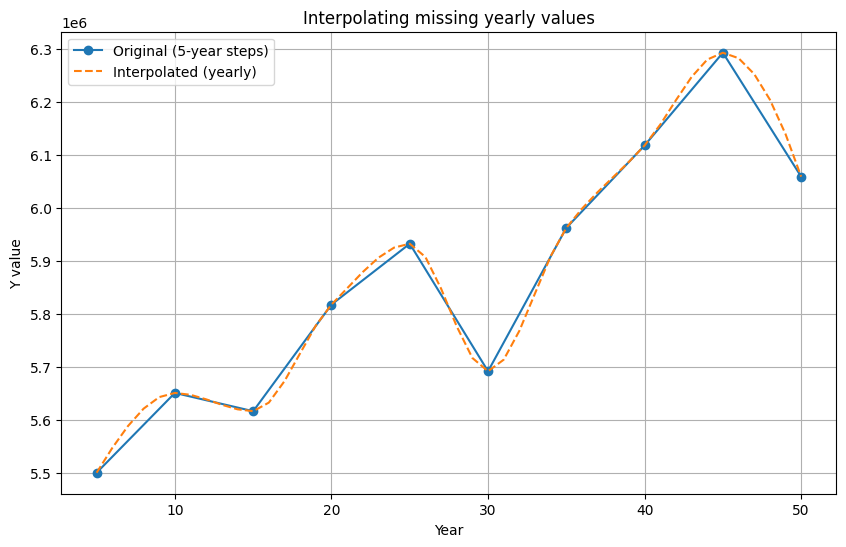

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import PchipInterpolator

def solve_missing_values(y, x):
    all_years = np.arange(min(x), max(x) + 1, 1)
    interp = PchipInterpolator(x, y)
    return interp(all_years), all_years

n = 10
start_val = 5.5 * 10**6
x = list(range(5, 55, 5))  # [5, 10, ..., 50]

# Generate values with ±5% change
y = [start_val]
rng = np.random.default_rng(seed=42)  # reproducible random numbers
for _ in range(n - 1):
    change_factor = 1 + rng.uniform(-0.05, 0.05)  # between -5% and +5%
    y.append(y[-1] * change_factor)

# Example data (replace with your own)

y_smooth, all_years = solve_missing_values(y, x)

# Plot
plt.figure(figsize=(10,6))
plt.plot(x, y, "o-", label="Original (5-year steps)")
plt.plot(all_years, y_smooth, "--", label="Interpolated (yearly)")
plt.xlabel("Year")
plt.ylabel("Y value")
plt.title("Interpolating missing yearly values")
plt.legend()
plt.grid(True)
plt.show()


In [1]:
import pandas as pd
from data_preprocess import Data
from database.utils import get_country
from tqdm import tqdm

pop_df = pd.read_csv("data\population_country_data.csv")
relig_df = pd.read_csv("data\\religion_base.csv")

pop_data = {}
pop_inv =  {}
for c in tqdm(pop_df["name"].unique()):
    a2 = pop_df[pop_df["name"] == c]["alpha_2"].unique()
    if isinstance(a2, list) and len(a2) > 1:
        print(f"a2 IS A LIST!!! {a2}, {c}")
        exit(0)
    a2 = a2[0]
    pop_data[c] = a2
    pop_inv[a2] = c

reg_data = {}
reg_inv = {}
for c in tqdm(relig_df["name"].unique()):
    a2 = relig_df[relig_df["name"] == c]["alpha_2"].unique()
    if isinstance(a2, list) and len(a2) > 1:
        print(f"a2 IS A LIST!!! {a2}, {c}")
        exit(0)
    a2 = a2[0]
    reg_data[c] = a2
    reg_inv[a2] = c


print(len(reg_data), len(pop_data))




<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
C:\Users\tvuontis\AppData\Local\Temp\ipykernel_25360\1947863432.py:6: SyntaxWarning: invalid escape sequence '\p'
  pop_df = pd.read_csv("data\population_country_data.csv")
100%|██████████| 185/185 [00:00<00:00, 2626.95it/s]

185 231


In [3]:
a, b = reg_inv, pop_inv
for key, value in a.items():
    if key not in b:
        print(f"{key}: {value} not in pop_inv")
print()
a,b = b,a
string = ""
counter = 0
for key, value in a.items():
    if key not in b:
        counter += 1
        string += f"{key}, {value}\n"
        print(f"{key}: {value} not in reg_inv")
print(counter)
with open("temp.txt", "w") as f:
    f.write(string)


AS: American Samoa not in reg_inv
AI: Anguilla not in reg_inv
AW: Aruba not in reg_inv
BM: Bermuda not in reg_inv
BQ: Bonaire, Sint Eustatius and Saba not in reg_inv
VG: Virgin Islands not in reg_inv
KY: Cayman Islands not in reg_inv
CK: Cook Islands not in reg_inv
FK: Falkland Islands (Malvinas) not in reg_inv
FO: Faroe Islands not in reg_inv
GF: French Guiana not in reg_inv
PF: French Polynesia not in reg_inv
GI: Gibraltar not in reg_inv
GL: Greenland not in reg_inv
GP: Guadeloupe not in reg_inv
GU: Guam not in reg_inv
GG: Guernsey not in reg_inv
VA: Holy See not in reg_inv
HK: Hong Kong not in reg_inv
IM: Isle of Man not in reg_inv
JE: Jersey not in reg_inv
MO: Macao not in reg_inv
MQ: Martinique not in reg_inv
YT: Mayotte not in reg_inv
MS: Montserrat not in reg_inv
NC: New Caledonia not in reg_inv
NU: Niue not in reg_inv
KP: North Korea not in reg_inv
MP: Northern Mariana Islands not in reg_inv
PR: Puerto Rico not in reg_inv
RE: Réunion not in reg_inv
BL: Saint Barthélemy not in 

In [ ]:
import pandas as pd
from database.utils import get_country

df = pd.read_csv("data\pop_relig_inner.csv")

df["diff"] = (df["population"] - df["pop"]).abs()
df["diff_ratio"] = (df["population"] - df["pop"]).abs() / df["pop"]
df_diff = df[df["diff_ratio"] > 0.10]

df_diff.sort_values(["diff_ratio"], ascending=False, inplace=True)
unique_df = df_diff.sort_values("diff_ratio", ascending=False)
unique_df = unique_df.drop_duplicates(subset="name_x", keep="first")

print(unique_df[["name_x", "name_y", "year", "pop", "population", "diff", "diff_ratio"]].head(20))



                    name_x                name_y  year        pop  population  \
4554               Curaçao           Netherlands  2002   15996090      144858   
6445              Viet Nam               Vietnam  1975   24032000    45896318   
852                 Bhutan                Bhutan  1999    2093096      575336   
2395     Equatorial Guinea     Equatorial Guinea  2010     698294     1161883   
4905              Pakistan              Pakistan  1970  128724000    59299056   
5232                Rwanda                Rwanda  1994    5391688     8191153   
5181    Russian Federation                Russia  1984  275699944   141918189   
16    United Arab Emirates  United Arab Emirates  1970     505000      262678   
3362                Kuwait                Kuwait  1991    2094200     1110154   
1876               Eritrea               Eritrea  2010    5234449     2913817   
3460               Lebanon               Lebanon  1991    2591305     3628693   
5249          Saudi Arabia  

<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
C:\Users\tvuontis\AppData\Local\Temp\ipykernel_16416\2266315487.py:4: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv("data\pop_relig_inner.csv")
C:\Users\tvuontis\AppData\Local\Temp\ipykernel_16416\2266315487.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diff.sort_values(["diff_ratio"], ascending=False, inplace=True)


In [13]:
pop_raw_df = pd.read_csv("data\population_country_data.csv")
print(pop_raw_df[pop_raw_df["name"] == "Curaçao"])

      Unnamed: 0     name  year alpha_2 ISO2_code  population
8306        8306  Curaçao  1970      NL        CW      150168
8308        8308  Curaçao  1971      NL        CW      151562
8310        8310  Curaçao  1972      NL        CW      152802
8312        8312  Curaçao  1973      NL        CW      153762
8314        8314  Curaçao  1974      NL        CW      154398
8316        8316  Curaçao  1975      NL        CW      154956
8318        8318  Curaçao  1976      NL        CW      155434
8320        8320  Curaçao  1977      NL        CW      155808
8322        8322  Curaçao  1978      NL        CW      156128
8324        8324  Curaçao  1979      NL        CW      156379
8326        8326  Curaçao  1980      NL        CW      156577
8328        8328  Curaçao  1981      NL        CW      156743
8330        8330  Curaçao  1982      NL        CW      156846
8332        8332  Curaçao  1983      NL        CW      156840
8334        8334  Curaçao  1984      NL        CW      156814
8336    

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\tvuontis\AppData\Local\Temp\ipykernel_16416\3671194848.py:1: SyntaxWarning: invalid escape sequence '\p'
  pop_raw_df = pd.read_csv("data\population_country_data.csv")


In [ ]:
import pandas as pd
from database.utils import get_country
df = pd.read_csv("data/cleanWDI.csv")
df.sort_values(["Country Code", "Time"], inplace=True)
df[df["Country Code"] == get_country("vietnam").alpha_2]

,Country Code,Time,"Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]","Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]","Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",Net migration [SM.POP.NETM],Individuals using the Internet (% of population) [IT.NET.USER.ZS],Gini index [SI.POV.GINI],Human capital index (HCI) (scale 0-1) [HD.HCI.OVRL],"School enrollment, secondary (gross), gender parity index (GPI) [SE.ENR.SECO.FM.ZS]","Literacy rate, youth (ages 15-24), gender parity index (GPI) [SE.ADT.1524.LT.FM.ZS]",Urban population (% of total population) [SP.URB.TOTL.IN.ZS],"Mortality rate, infant (per 1,000 live births) [SP.DYN.IMRT.IN]","Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]"
13520,VN,1960,6.273,41.589,12.225,58.046,0.0,NaN,NaN,0.656642,1.045830,1.0,14.700,NaN,NaN
13521,VN,1961,5.476,35.639,11.724,58.461,0.0,NaN,NaN,0.656642,1.045830,1.0,15.031,NaN,NaN
13522,VN,1962,6.257,39.972,11.973,58.204,0.0,NaN,NaN,0.656642,1.045830,1.0,15.369,NaN,NaN
13523,VN,1963,6.385,39.952,12.687,56.897,0.0,NaN,NaN,0.656642,1.045830,1.0,15.714,NaN,NaN
13524,VN,1964,6.285,38.561,12.313,57.473,-6328.0,NaN,NaN,0.656642,1.045830,1.0,16.064,55.2,NaN
13525,VN,1965,6.156,37.087,12.477,56.967,-1438.0,NaN,NaN,0.656642,1.045830,1.0,16.421,60.1,NaN
13526,VN,1966,5.968,35.441,12.396,56.914,1769.0,NaN,NaN,0.656642,1.045830,1.0,16.784,60.4,NaN
13527,VN,1967,5.883,34.575,12.411,56.745,394.0,NaN,NaN,0.656642,1.045830,1.0,17.153,60.8,NaN
13528,VN,1968,6.029,35.221,14.707,52.668,1489.0,NaN,NaN,0.656642,1.045830,1.0,17.529,67.0,NaN
13529,VN,1969,6.013,35.077,13.433,54.791,0.0,NaN,NaN,0.656642,1.045830,1.0,17.911,63.8,NaN
